In [ ]:
library(dplyr)
library(ggplot2)
library(ggrepel)
library(data.table)
library(Seurat)
library(pheatmap)
library(RColorBrewer)
library(Matrix)
library(fitdistrplus)
source("/projects/ps-renlab2/y2xie/scripts/Paired-HiC/phc_help.R")
source("/projects/ps-renlab2/y2xie/scripts/basics.R")
source("/projects/ps-renlab2/y2xie/scripts/DPT_help.R")

## Check ecMYC trans interaction (Fig.3D)

In [10]:
### EGFR: chr7:55,017,017-55,213,628
### MYC: chr8:127,733,434-127,744,951
sample <- "LC676"
c1 <- "chr8"
sstart <- c(127000000, 127500000)
pcutoff <- 0.01
bin <- as.integer(500000)
bs = bin / 1000

mtx <- fread(paste0("../04.matrices/", sample, "_merged_hg38_", bs, "k.matrix.mtx"), header = T)
cnv <- read.table(paste0("../04.matrices/", sample, "_merged_hg38/", sample,  "_merged_hg38_", bin, ".CNV.bedGraph")) %>% 
setNames(c("chrom", "start", "end", "residuals"))

for (start in sstart){
    tmtx <- mtx[mtx$chrom1 == c1 & mtx$start1 == start, ]
    tmtx <- tmtx %>% mutate(bin = paste0(chrom2, ":", start2, "-", end2))
    cnv <- cnv %>% mutate(bin = paste0(chrom, ":", start, "-", end))
    tmtx <- merge(tmtx, cnv[,c("bin", "residuals")], by = "bin") %>%
    as.data.frame %>% arrange(bin)

    tmtx <- FindTransNorm(tmtx, p_cutoff = pcutoff, chrom_norm = TRUE)

    labels <- c(1, which(tmtx$chrom2[-1] != tmtx$chrom2[-length(tmtx$chrom2)]) + 1)
    labelm <- tmtx$chrom2[labels]

    ptmtx <- tmtx %>% tibble::rowid_to_column("nbin") 

    fig1 <- ptmtx %>%
    ggplot(aes(x = nbin, y = residuals)) + 
    geom_point(color = "grey") + geom_line(color = "grey") + 
    geom_point(data = ptmtx[ptmtx$sig_trans == "True", ], aes(x = nbin, y = residuals), color = "red") + 
    theme_Publication() + ggtitle(paste0("Approximate copy number")) + 
    ylab("Residuals") + xlab("") + 
    scale_x_continuous(breaks = labels, labels = labelm) + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

    ggsave(fig1, filename = paste0(sample, "_", c1, "_", start, "_", bs, "k_trans_interaction_cnv.png"), dpi = 300, width = 30, height = 6)

    fig1 <- ptmtx %>%
    ggplot(aes(x = nbin, y = count)) + 
    geom_point(color = "grey") + geom_line(color = "grey") + 
    geom_point(data = ptmtx[ptmtx$sig_trans == "True", ], aes(x = nbin, y = count), color = "red") + 
    theme_Publication() + ggtitle(paste0(c1, "_", as.character(start), " trans contacts")) + 
    xlab("") + ylab("raw counts") + 
    scale_x_continuous(breaks = labels, labels = labelm) + 
    scale_y_log10() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

    ggsave(fig1, filename = paste0(sample, "_", c1, "_", as.integer(start), "_", bs, "k_trans_interaction_raw_count.png"), dpi = 300, width = 30, height = 6)

    write.table(ptmtx, paste0(sample, "_", c1, "_", as.integer(start), "_", bs, "k_trans_interaction_cnv.xls"), 
                row.names = F, col.names = T, sep = "\t", quote = F)
}

[1] "find significant trans interaction for bin chr8:127700000 with cnv normalization"
[1] "p value cutoff after correction: 0.01"
[1] "start calculation..."
[1] "chromosome: chr1, significant trans interactions with chr8:127700000: 2"
[1] "chromosome: chr10, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr11, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr12, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr13, significant trans interactions with chr8:127700000: 2"
[1] "chromosome: chr14, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr15, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr16, significant trans interactions with chr8:127700000: 1"
[1] "chromosome: chr17, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr18, significant trans interactions with chr8:127700000: 0"
[1] "chromosome: chr19, significant trans interaction

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”


[1] "find significant trans interaction for bin chr8:127800000 with cnv normalization"
[1] "p value cutoff after correction: 0.01"
[1] "start calculation..."
[1] "chromosome: chr1, significant trans interactions with chr8:127800000: 5"
[1] "chromosome: chr10, significant trans interactions with chr8:127800000: 0"
[1] "chromosome: chr11, significant trans interactions with chr8:127800000: 0"
[1] "chromosome: chr12, significant trans interactions with chr8:127800000: 0"
[1] "chromosome: chr13, significant trans interactions with chr8:127800000: 2"
[1] "chromosome: chr14, significant trans interactions with chr8:127800000: 0"
[1] "chromosome: chr15, significant trans interactions with chr8:127800000: 1"
[1] "chromosome: chr16, significant trans interactions with chr8:127800000: 1"
[1] "chromosome: chr17, significant trans interactions with chr8:127800000: 0"
[1] "chromosome: chr18, significant trans interactions with chr8:127800000: 0"
[1] "chromosome: chr19, significant trans interaction

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”


[1] "find significant trans interaction for bin chr8:127900000 with cnv normalization"
[1] "p value cutoff after correction: 0.01"
[1] "start calculation..."
[1] "chromosome: chr1, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr10, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr11, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr12, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr13, significant trans interactions with chr8:127900000: 2"
[1] "chromosome: chr14, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr15, significant trans interactions with chr8:127900000: 1"
[1] "chromosome: chr16, significant trans interactions with chr8:127900000: 1"
[1] "chromosome: chr17, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr18, significant trans interactions with chr8:127900000: 0"
[1] "chromosome: chr19, significant trans interaction

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”


### Plot circos map 

In [177]:
library(circlize)
t1 <- read.table("LC676_chr8_127000000_500k_trans_interaction_cnv.xls", header = T, row.names = 1) ### calculated above
t1$sample <- "LC676"
t2 <- read.table("LC677_chr8_127000000_500k_trans_interaction_cnv.xls", header = T, row.names = 1)
t2$sample <- "LC677"

t1 <- rbind(t1,t2)
t1_left <- t1[t1$sig_trans == "True", c("chrom1","start1","end1", "sample")]
t1_right <- t1[t1$sig_trans == "True", c("chrom2","start2","end2", "sample")]

pdf("LC676_677_chr8_127000000_500k_trans_interaction.pdf", height = 6, width = 6) 
circos.clear()
circos.par("start.degree" = 90)
circos.initializeWithIdeogram(plotType = 'axis', cytoband = "/projects/ps-renlab2/y2xie/projects/genome_ref/hg38.main.cytoBand.txt", # species = "hg38", 
                              chromosome.index = paste0("chr", c(1:22, "X")))
circos.track(ylim=c(0, 1), panel.fun=function(x, y) {
    chr=CELL_META$sector.index
    xlim=CELL_META$xlim
    ylim=CELL_META$ylim
    circos.text(mean(xlim), mean(ylim), chr, cex=0.5, col="grey40", 
                facing="bending.inside", niceFacing = TRUE)
}, bg.col="grey90", bg.border=F, track.height=0.06)

circos.genomicLink(t1_left, t1_right, col = c(rep('#386cb0', times = nrow(t1_left[t1_left$sample == "LC676",])), 
                                              rep('#fdb462', times = nrow(t1_left[t1_left$sample == "LC677",]))))

dev.off()
### HSR contacts are more "concentrated"

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




png 
  2

## ecDNA calling with deep learning model (Fig.3H)

In [3]:
chrom_order <- read.table("/projects/ps-renlab/y2xie/projects/genome_ref/hg38.main.chrom.sizes")

### results are from ecDNA deep learning prediction model
for (file in list.files("../../38.scHiC_GBM/ecDNA_prediction_JC_results_240103/", pattern = "(^LC676|^LC677)_summary")){
    library <- gsub("^([^_]+)_summary_([^.]+).txt", "\\1", file)
    type <- gsub("^([^_]+)_summary_([^.]+).txt", "\\2", file)
    tmp <- read.table(paste0("../../38.scHiC_GBM/ecDNA_prediction_JC_results_240103/", file), header = T)
    tmp$chr <- factor(tmp$chr, levels = chrom_order$V1[1:23])
    first_appear_indices = unlist(lapply(split(seq_len(nrow(tmp)), tmp$chr), function(x) x[1]))

    t1 <- tmp %>%
    tibble::rowid_to_column("id") %>%
    ggplot(aes(x = id, y = 100*freq)) +
    geom_point(color = colfunc2(6)[1], size = 3) + 
    geom_vline(xintercept = first_appear_indices, linetype = "dashed", alpha = 0.1) +
    theme_classic() + # scale_color_viridis() + 
    xlab("") + ylim(c(0, 100)) + ylab(paste0(type, " Percentages"))

    ggsave(t1, filename = paste0("plot/240103_freq_", library, "_", type, "_prop_JC.pdf"), dpi = 300, height = 4, width = 10)
}

## Plot ecDNA bin featurse (Fig.3E-G)

In [2]:
### single cell contact summary is calculated using sc_summary.sh
meta <- list()
lib <- "LC676"
for (f in list.files(paste0("../04.matrices/", lib, "/"), pattern = "^LC\\d{3}.*.hg38.sc_\\w{16}$")){
    file <- list.files(path = paste0("../04.matrices/", lib, "/", f), pattern = "contacts_summary.txt", recursive = T)
    abs_file <- paste0("../04.matrices/", lib, "/", f, "/", file)
    if (length(file) > 0){
        meta[[f]] <- read.table(abs_file, header = T, sep = "\t")
        meta[[f]]$cluster <- f
        meta[[f]]$bin <- rownames(meta[[f]])
    }
    else{next}
}
meta_all <- do.call(rbind, meta)

In [4]:
meta_all <- meta_all %>%
filter(inter > 5 & residuals > 0.5) %>%
group_by(cluster) %>%
mutate(total_contacts = sum(contacts)) %>% 
mutate(aveTIF = sum(inter) / sum(inter_bin)) %>%
mutate(nbins = n_distinct(bin, na.rm = TRUE)) %>%
ungroup %>%
filter(nbins > 20) %>%
mutate(nTIF = (inter / inter_bin) / aveTIF)

In [3]:
meta2 <- list()
lib <- "LC677"
for (f in list.files(paste0("../04.matrices/", lib, "/"), pattern = "^LC\\d{3}.*.hg38.sc_\\w{16}$")){
    file <- list.files(path = paste0("../04.matrices/", lib, "/", f), pattern = "contacts_summary.txt", recursive = T)
    abs_file <- paste0("../04.matrices/", lib, "/", f, "/", file)
    if (length(file) > 0){
        meta2[[f]] <- read.table(abs_file, header = T, sep = "\t")
        meta2[[f]]$cluster <- f
        meta2[[f]]$bin <- rownames(meta2[[f]])
    }
    else{next}
}
meta_all2 <- do.call(rbind, meta2)

In [ ]:
meta_all2 <- meta_all2 %>%
filter(inter > 5 & residuals > 0.5) %>%
group_by(cluster) %>%
mutate(total_contacts = sum(contacts)) %>% 
mutate(aveTIF = sum(inter) / sum(inter_bin)) %>%
mutate(nbins = n_distinct(bin, na.rm = TRUE)) %>%
ungroup %>%
filter(nbins > 20) %>%
mutate(nTIF = (inter / inter_bin) / aveTIF)

In [35]:
meta_all <- rbind(meta_all, meta_all2)
meta_all$sample <- gsub("^([^_]+)_(.*)$", "\\1", meta_all$cluster)
head(meta_all)

,contacts,contacts_bin,intra,inter,intra_bin,inter_bin,residuals,cluster,bin,sample
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
LC676_merged_hg38.sc_AAACTCGGTGCCCAGT.chr1:0-1000000,0,0,0,0,0,0,0.00000000,LC676_merged_hg38.sc_AAACTCGGTGCCCAGT,chr1:0-1000000,LC676
LC676_merged_hg38.sc_AAACTCGGTGCCCAGT.chr1:1000000-2000000,1,1,1,0,1,0,0.06592899,LC676_merged_hg38.sc_AAACTCGGTGCCCAGT,chr1:1000000-2000000,LC676
LC676_merged_hg38.sc_AAACTCGGTGCCCAGT.chr1:10000000-11000000,8,1,8,0,1,0,0.65256305,LC676_merged_hg38.sc_AAACTCGGTGCCCAGT,chr1:10000000-11000000,LC676
LC676_merged_hg38.sc_AAACTCGGTGCCCAGT.chr1:100000000-101000000,14,4,11,3,1,3,0.73321520,LC676_merged_hg38.sc_AAACTCGGTGCCCAGT,chr1:100000000-101000000,LC676
LC676_merged_hg38.sc_AAACTCGGTGCCCAGT.chr1:101000000-102000000,12,1,12,0,1,0,0.85440175,LC676_merged_hg38.sc_AAACTCGGTGCCCAGT,chr1:101000000-102000000,LC676
LC676_merged_hg38.sc_AAACTCGGTGCCCAGT.chr1:102000000-103000000,13,5,10,3,2,3,0.42017857,LC676_merged_hg38.sc_AAACTCGGTGCCCAGT,chr1:102000000-103000000,LC676


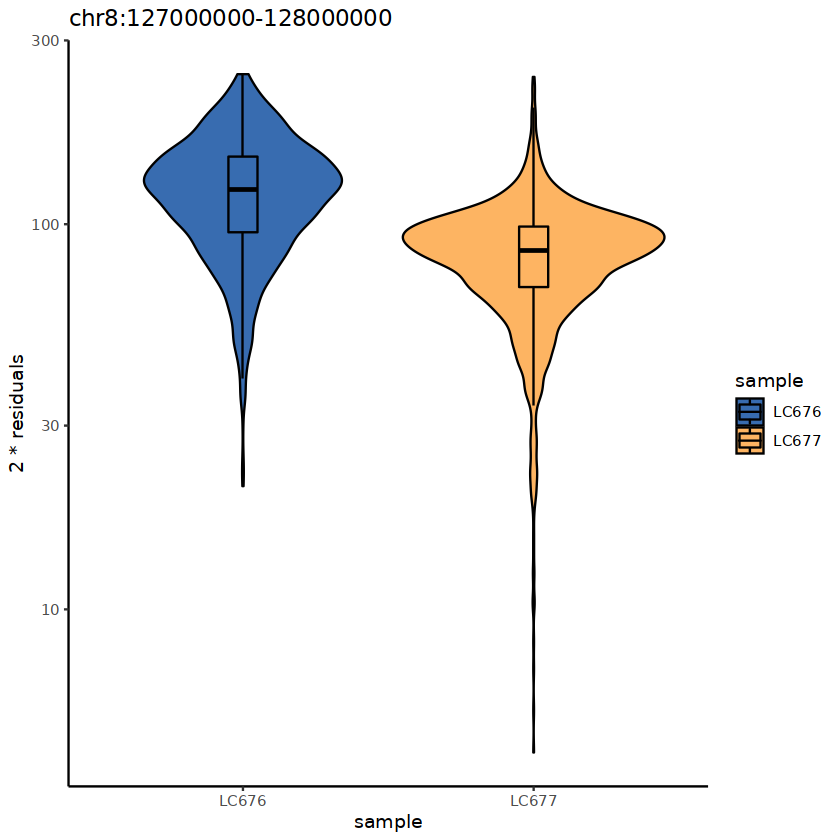

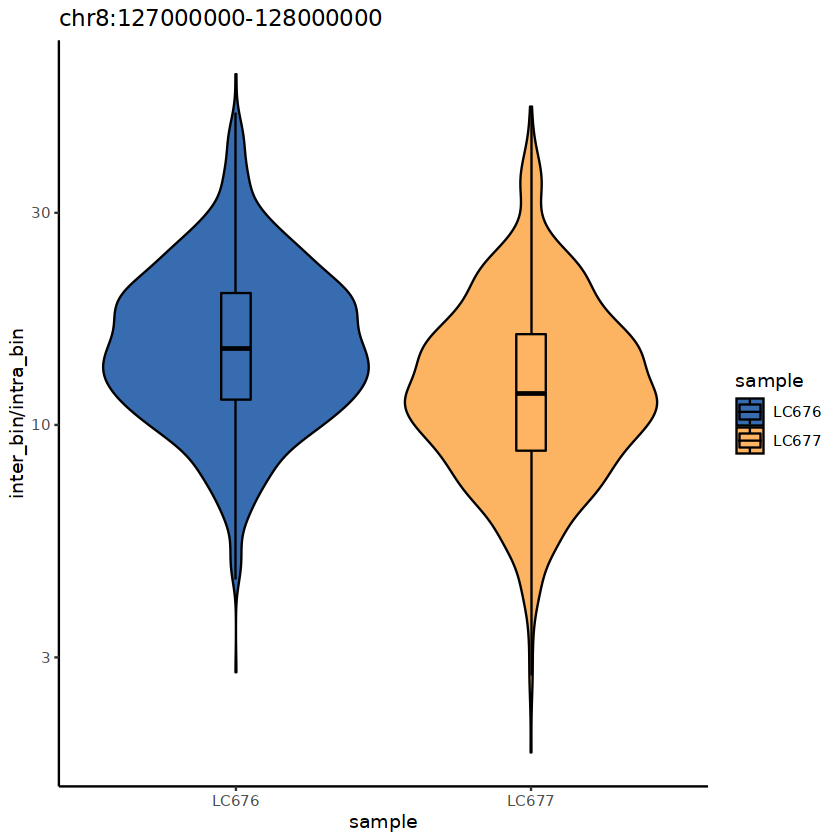

In [36]:
meta_all %>%
filter(bin %in% c("chr8:127000000-128000000")) %>%
ggplot(aes(x = sample, y = 2*residuals, fill = sample)) + 
geom_violin(color = "black") + 
geom_boxplot(width=0.1, color="black", alpha=0.8, coef = 2, outlier.shape = NA) + 
scale_fill_Publication() + ggtitle("chr8:127000000-128000000") + 
scale_y_log10() + theme_classic()

meta_all %>%
filter(bin %in% c("chr8:127000000-128000000")) %>%
ggplot(aes(x = sample, y = inter_bin/intra_bin, fill = sample)) + 
geom_violin(color = "black") + 
geom_boxplot(width=0.1, color="black", alpha=0.8, coef = 2, outlier.shape = NA) + 
scale_fill_Publication() + ggtitle("chr8:127000000-128000000") + 
scale_y_log10() + theme_classic()

In [ ]:
### based on contact summary, generate by-bin summary
meta_sc <- list()
lib <- "LC676"
i = 1

for (f in list.files(paste0("../04.matrices/", lib, "/"), pattern = "^LC\\d{3}.*.hg38.sc_\\w{16}$")){
    file <- list.files(path = paste0("../04.matrices/", lib, "/", f), pattern = "contacts_summary.txt", recursive = T)
    abs_file <- paste0("../04.matrices/", lib, "/", f, "/", file)
    if (length(file) > 0){
        name <- read.table(paste0("../04.matrices/", lib, "/", f, "/barcode.tsv"), header = T)
        name <- name %>%
        mutate(bin = paste0(chrom, ":", start, "-", end)) %>%
        tibble::rownames_to_column("index")

        dataset <- read.table(paste0("../04.matrices/", lib, "/", f, "/matrix.mtx"), header = T)
        dataset <- dataset %>%
        mutate(bin1_id = paste0(chrom1, ":", start1, "-", end1)) %>%
        mutate(bin2_id = paste0(chrom2, ":", start2, "-", end2))
        
        ### shuffle bin: shuffle trans only!!!
        # dataset$bin1_id <- sample(dataset$bin1_id)
        dataset[dataset$]$bin2_id <- sample(dataset$bin2_id)
        
        dataset$bin1_index <- name[match(dataset$bin1_id, name$bin), "index"]
        dataset$bin2_index <- name[match(dataset$bin2_id, name$bin), "index"]

        ### coarse to sparse
        mat <- sparseMatrix(i = as.integer(dataset[,"bin1_index"]),
                            j = as.integer(dataset[,"bin2_index"]),
                            x = dataset[,"count"])

        rownames(mat) <- name$bin[1:nrow(mat)]
        colnames(mat) <- name$bin[1:ncol(mat)]

        tmp <- mat
        colnames(tmp) <- gsub("^([^:]+):([^:]+)$", "\\1", colnames(tmp))
        tmp <- as(tmp, "dgTMatrix")
        obj_mtx_collapse <- OP2(tmp)
        meta_sc[[f]] <- obj_mtx_collapse %>% as.matrix %>% reshape2::melt() %>% dplyr::filter(value > 0)
        meta_sc[[f]]$cluster <- f
        # i = i + 1
    }
    else{next}
}

test1 <- do.call(rbind, meta_sc)

In [ ]:
meta_sc2 <- list()
lib <- "LC677"
i = 1

for (f in list.files(paste0("../04.matrices/", lib, "/"), pattern = "^LC\\d{3}.*.hg38.sc_\\w{16}$")){
    file <- list.files(path = paste0("../04.matrices/", lib, "/", f), pattern = "contacts_summary.txt", recursive = T)
    abs_file <- paste0("../04.matrices/", lib, "/", f, "/", file)
    if (length(file) > 0){
        name <- read.table(paste0("../04.matrices/", lib, "/", f, "/barcode.tsv"), header = T)
        name <- name %>%
        mutate(bin = paste0(chrom, ":", start, "-", end)) %>%
        tibble::rownames_to_column("index")

        dataset <- read.table(paste0("../04.matrices/", lib, "/", f, "/matrix.mtx"), header = T)
        dataset <- dataset %>%
        mutate(bin1_id = paste0(chrom1, ":", start1, "-", end1)) %>%
        mutate(bin2_id = paste0(chrom2, ":", start2, "-", end2))
        
        ### shuffle bin: shuffle trans only!!!
        # dataset$bin1_id <- sample(dataset$bin1_id)
        dataset[dataset$]$bin2_id <- sample(dataset$bin2_id)
        
        dataset$bin1_index <- name[match(dataset$bin1_id, name$bin), "index"]
        dataset$bin2_index <- name[match(dataset$bin2_id, name$bin), "index"]

        ### coarse to sparse
        mat <- sparseMatrix(i = as.integer(dataset[,"bin1_index"]),
                            j = as.integer(dataset[,"bin2_index"]),
                            x = dataset[,"count"])

        rownames(mat) <- name$bin[1:nrow(mat)]
        colnames(mat) <- name$bin[1:ncol(mat)]

        tmp <- mat
        colnames(tmp) <- gsub("^([^:]+):([^:]+)$", "\\1", colnames(tmp))
        tmp <- as(tmp, "dgTMatrix")
        obj_mtx_collapse <- OP2(tmp)
        meta_sc2[[f]] <- obj_mtx_collapse %>% as.matrix %>% reshape2::melt() %>% dplyr::filter(value > 0)
        meta_sc2[[f]]$cluster <- f
        # i = i + 1
    }
    else{next}
}

test2 <- do.call(rbind, meta_sc2)

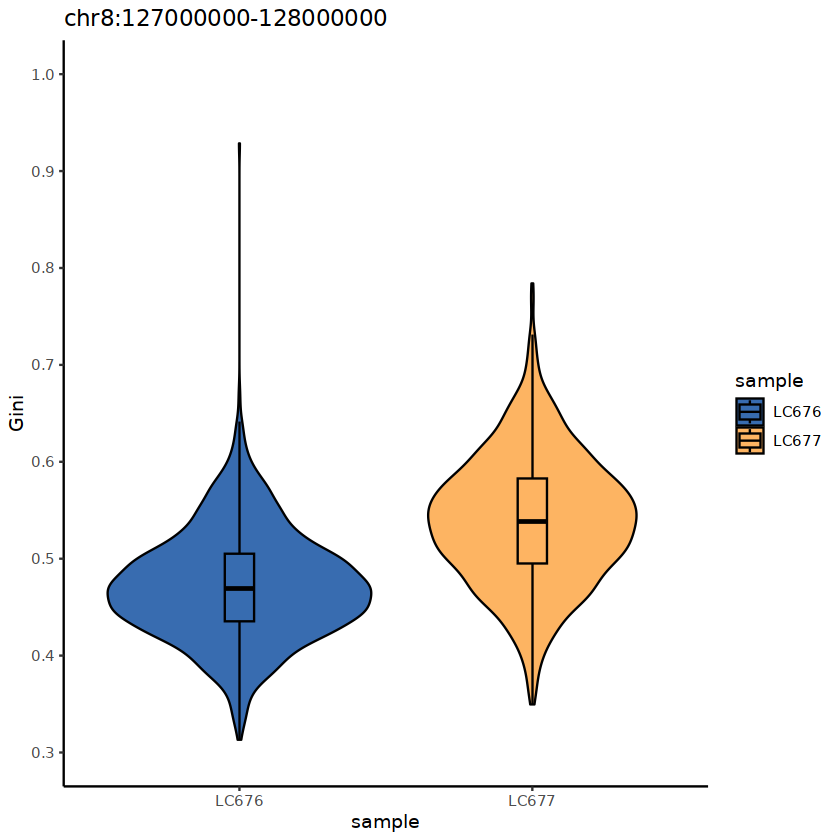

In [189]:
test <- rbind(test1, test2)

### hub index
qry_bin <- "chr8:127000000-128000000"
sname <- "chr8_127000000-128000000"

library(ineq)
ttest <- tibble(test) %>%
filter(cluster %in% meta_all$cluster) %>%
filter(Var1 %in% qry_bin) %>% tidyr::complete(cluster, Var2)

ttest <- ttest %>% 
group_by(cluster) %>%
filter(!(Var2 %in% c("chr8", "chrY"))) %>%
mutate(value = ifelse(is.na(value), 0, value)) %>%
summarise(Gini = ineq(value)) %>%
mutate(sample = substr(cluster, 1, 5))

t2 <- ttest[,c("sample", "Gini")] %>%
distinct %>%
ggplot(aes(x = sample, y = Gini, fill = sample)) + 
geom_violin(color = "black") + 
geom_boxplot(width=0.1, color="black", alpha=0.8, coef = 2, outlier.shape = NA) + 
scale_fill_Publication() + ggtitle(paste0(qry_bin)) +  
scale_y_continuous(breaks = seq(0, 1, 0.1), limits = c(0.3, 1)) + 
theme_classic()

t2